In [37]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

# data_key = 'ml-1m/'
data_key = 'amz_Movies_and_TV/'
# data_key = 'amz_Electronics/'
PROCESSED_DATA_ROOT = "/home/sl1471/workspace/experiments/"
target_path = PROCESSED_DATA_ROOT + data_key

### 1. Extract Results from Logs

In [38]:
from utils import extract_results
log_path = target_path + "logs/"
control_args = ['lr', 'l2_coef', 'fair_group_feature', 'fair_lambda', 'fair_noise_sigma', 'n_local_step']
results = extract_results(log_path, control_args, "f2rec_train_and_eval")
print(results.keys())

50it [00:00, 593.41it/s]

f2rec_train_and_eval_FairFedMF_lr0.03_reg1.0_losspairwisebpr_lambda0.7_sigma0_gactivity.log
f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda-0.9_gactivity.log
f2rec_train_and_eval_FairFedMF_lr0.03_reg1.0_losspairwisebpr_lambda0.3_sigma0_gactivity.log
f2rec_train_and_eval_FedMF_lr0.01_reg0.1_losspairwisebpr_local1_fedavg.log
f2rec_train_and_eval_FairMF_lr0.00003_reg1.0_losspairwisebpr_lambda-0.1_gactivity.log
f2rec_train_and_eval_FedMF_lr0.0001_reg1.0_losspairwisebpr_local3_fedavg.log
f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.1_sigma0.01_gactivity.log
f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda0.7_gactivity.log
f2rec_train_and_eval_FairFedMF_lr0.03_reg1.0_losspairwisebpr_lambda-0.1_sigma0_gactivity.log
f2rec_train_and_eval_FedMF_lr0.001_reg0.1_losspairwisebpr_local1_fedavg.log
f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda-0.5_gactivity.log
f2rec_train_and_eval_FairFedMF_lr0.03_reg1.0_losspairwis

In [39]:
import json
print("Example:")
print(json.dumps(list(results.values())[0], indent = 4))

Example:
{
    "args": "cuda=1, seed=19, train=False, train_and_eval=True, continuous_train=False, eval=False, model_path='/home/sl1471/workspace/experiments/amz_Movies_and_TV/models/f2rec_FairFedMF_lr0.03_reg1.0_losspairwisebpr_lambda0.7_sigma0_gactivity.pkl', loss='pairwisebpr', l2_coef=1.0, emb_size=32, device_dropout_p=0.1, device_dropout_type='same', n_local_step=1, random_local_step=False, aggregation_func='fedavg', mitigation_trade_off=1.0, elastic_mu=0.01, data_file='/home/sl1471/workspace/experiments/amz_Movies_and_TV/tsv_data/', n_worker=4, user_meta_data='/home/sl1471/workspace/experiments/amz_Movies_and_TV/meta_data/user.meta', item_meta_data='/home/sl1471/workspace/experiments/amz_Movies_and_TV/meta_data/item.meta', user_fields_meta_file='/home/sl1471/workspace/experiments/amz_Movies_and_TV/meta_data/user_fields.meta', item_fields_meta_file='/home/sl1471/workspace/experiments/amz_Movies_and_TV/meta_data/item_fields.meta', user_fields_vocab_file='/home/sl1471/workspace/expe

In [40]:
import numpy as np
metrics = [f"{m_name}@{i}" for i in [1,5,10,20,50] for m_name in ['HR', 'RECALL', 'P', 'F1', 'NDCG']] + ["AUC", "MR", "MRR"]
# for m_name in ['HR', 'RECALL', 'P', 'F1', 'NDCG']:
#     metrics += [f"{m_name}@{i}" for i in [1,5,10,20,50]]
# metrics += ["AUC", "MR", "MRR"]
for m_name in metrics:
    for k, res_dict in results.items():
        if m_name in res_dict:
            res_dict[m_name] = np.mean(res_dict[m_name])

In [41]:
import pandas as pd
df = pd.DataFrame.from_dict(results, orient = 'index')
df

,args,model_name,lr,l2_coef,fair_group_feature,fair_lambda,fair_noise_sigma,n_local_step,HR@1,P@1,...,NDCG@20,HR@50,P@50,RECALL@50,F1@50,NDCG@50,MR,MRR,AUC,fair_activity
0,"cuda=1, seed=19, train=False, train_and_eval=T...",FedMF,0.03000,1.0,activity,0.7,0.0,1,0.007133,0.007133,...,0.016098,0.213980,0.007695,0.048986,0.012106,0.025201,734.708358,0.006347,0.686889,[0.00011876545705169494]
1,"cuda=3, seed=29, train=False, train_and_eval=T...",MF,0.00001,1.0,activity,-0.9,NaN,NaN,0.008933,0.008933,...,0.016288,0.254148,0.008051,0.055585,0.013117,0.027414,524.750086,0.007057,0.774179,NaN
2,"cuda=1, seed=19, train=False, train_and_eval=T...",FedMF,0.03000,1.0,activity,0.3,0.0,1,0.010666,0.010666,...,0.016878,0.217549,0.007853,0.050922,0.012394,0.026449,717.995429,0.006820,0.694273,[0.0002268604586695977]
3,"cuda=3, seed=19, train=False, train_and_eval=T...",FedMF,0.01000,0.1,NaN,NaN,NaN,1,0.007475,0.007475,...,0.018425,0.222607,0.008215,0.053351,0.013018,0.027438,710.578810,0.006803,0.696921,NaN
4,"cuda=2, seed=19, train=False, train_and_eval=T...",MF,0.00003,1.0,activity,-0.1,NaN,NaN,0.005834,0.005834,...,0.010919,0.202917,0.005692,0.039400,0.009272,0.019093,571.857562,0.005249,0.753626,NaN
5,"cuda=3, seed=19, train=False, train_and_eval=T...",FedMF,0.00010,1.0,NaN,NaN,NaN,3,0.008387,0.008387,...,0.017939,0.222972,0.008036,0.051862,0.012693,0.026959,808.314228,0.006710,0.655214,NaN
6,"cuda=3, seed=19, train=False, train_and_eval=T...",FedMF,0.00300,1.0,activity,0.1,0.01,1,0.007502,0.007502,...,0.018361,0.220195,0.008171,0.052732,0.012890,0.027336,716.784130,0.006848,0.694071,[0.0005022308950882737]
7,"cuda=3, seed=29, train=False, train_and_eval=T...",MF,0.00001,1.0,activity,0.7,NaN,NaN,0.014221,0.014221,...,0.018589,0.215679,0.007573,0.052284,0.012376,0.028267,676.712808,0.008293,0.711820,NaN
8,"cuda=1, seed=19, train=False, train_and_eval=T...",FedMF,0.03000,1.0,activity,-0.1,0.0,1,0.007849,0.007849,...,0.015372,0.214530,0.007486,0.048137,0.011787,0.024491,708.309682,0.006215,0.697578,[0.000456280125214481]
10,"cuda=3, seed=29, train=False, train_and_eval=T...",MF,0.00001,1.0,activity,-0.5,NaN,NaN,0.007840,0.007840,...,0.019607,0.263993,0.008525,0.058693,0.013867,0.030037,522.172179,0.007904,0.775773,NaN


In [42]:
import os
import datetime
try:
    os.mkdir(target_path + "results/")
except:
    print("Dir exists: '" + target_path + "results/'")
result_file_path = target_path + "results/recommendation_performance.csv"
# result_file_path = target_path + "results/" + datetime.datetime.now().strftime('%Y%m%d_%H%M%S') + ".csv"
df.to_csv(result_file_path, sep = '\t')

Dir exists: '/home/sl1471/workspace/experiments/amz_Movies_and_TV/results/'


## Plots

### 1. Lambda plot

In [43]:
def get_fair_model_lambda_comparison(df, model_name, params, selected_lambda):
    '''
    @output:
    - lambda_result: {metric: [value]}
    '''
    compare_feature = 'fair_lambda'
    subset = df[df['model_name'] == model_name]
    for k,v in params.items():
        subset = subset[subset[k] == v]
    lambda_rows = {lbd:idx for idx,lbd in enumerate(np.array(subset['fair_lambda']))}
    selected_rows = [lambda_rows[lbd] for lbd in selected_lambda]
    return {m: np.array(subset[m])[selected_rows] for m in metrics}

In [46]:
df['AUC'][df.index==49]

49    0.705698
Name: AUC, dtype: float64

In [47]:

selected_lambda = [-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9]
'''
ML1M
'''
# mf_row = 26
# fedmf_row = 4
# mf_result = {m: df[m].iloc[mf_row] for m in metrics}
# fedmf_result = {m: df[m].iloc[fedmf_row] for m in metrics}

# fairmf_result = get_fair_model_lambda_comparison(df, 'MF',
#         {'lr': 0.00003, 'l2_coef': 0.1, 'fair_group_feature': 'activity'}, selected_lambda)
# fedfairmf_result = get_fair_model_lambda_comparison(df, 'FedMF',
#         {'lr': 0.003, 'l2_coef': 0.1, 'fair_group_feature': 'activity'}, selected_lambda)
'''
Movies
'''
mf_row = 49
fedmf_row = 26
mf_result = {m: df[m][df.index==mf_row] for m in metrics}
fedmf_result = {m: df[m][df.index==fedmf_row] for m in metrics}
fairmf_result = get_fair_model_lambda_comparison(df, 'MF', 
        {'lr': 0.00001, 'l2_coef': 1.0, 'fair_group_feature': 'activity'}, selected_lambda)
fedfairmf_result = get_fair_model_lambda_comparison(df, 'FedMF', 
        {'lr': 0.03, 'l2_coef': 1.0, 'fair_group_feature': 'activity'}, selected_lambda)

KeyError: -0.7

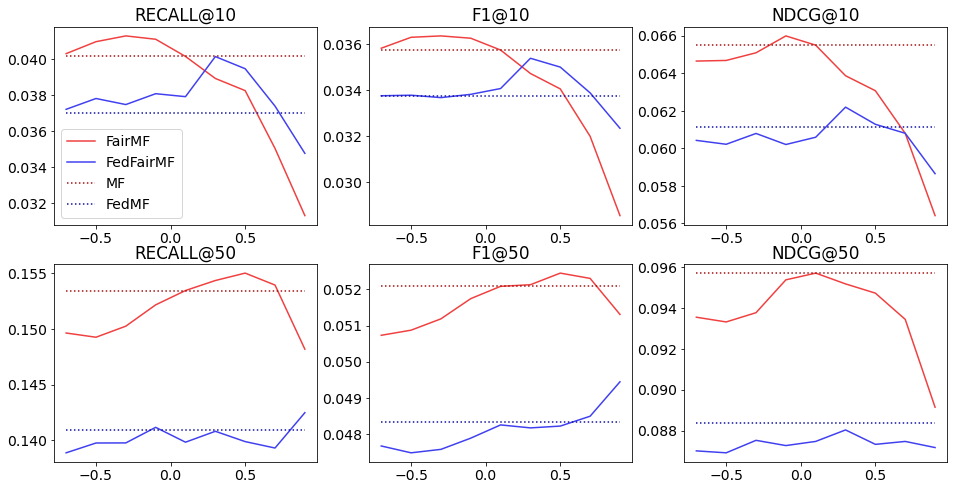

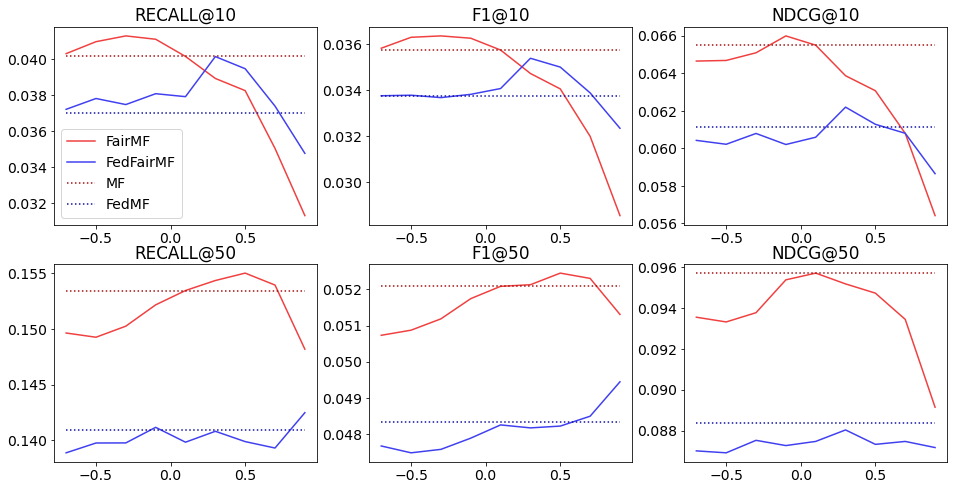

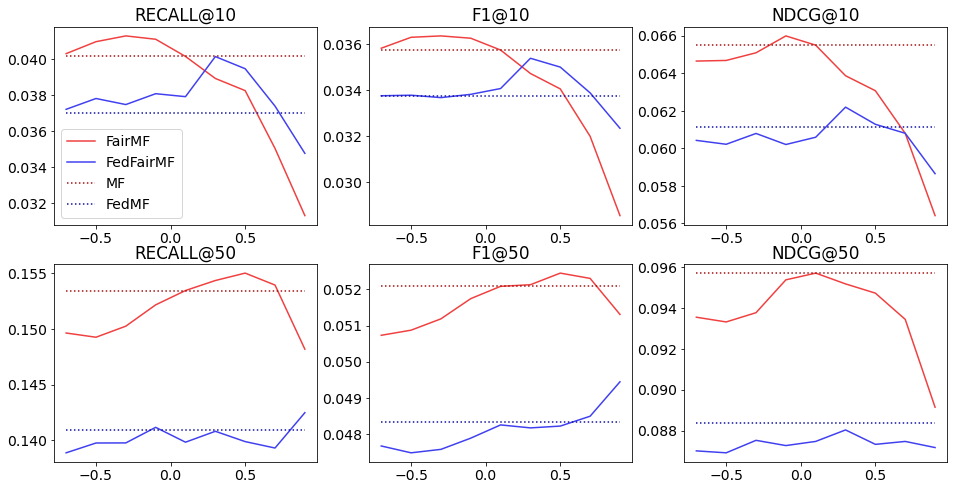

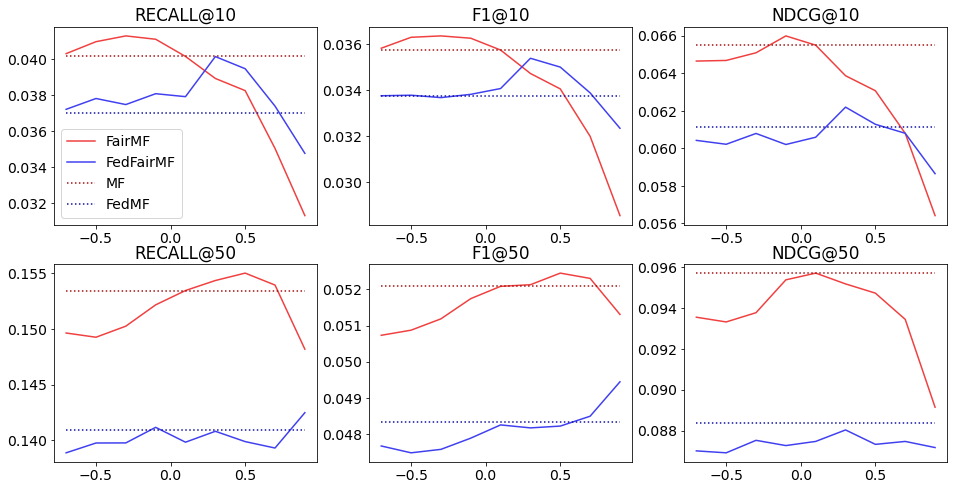

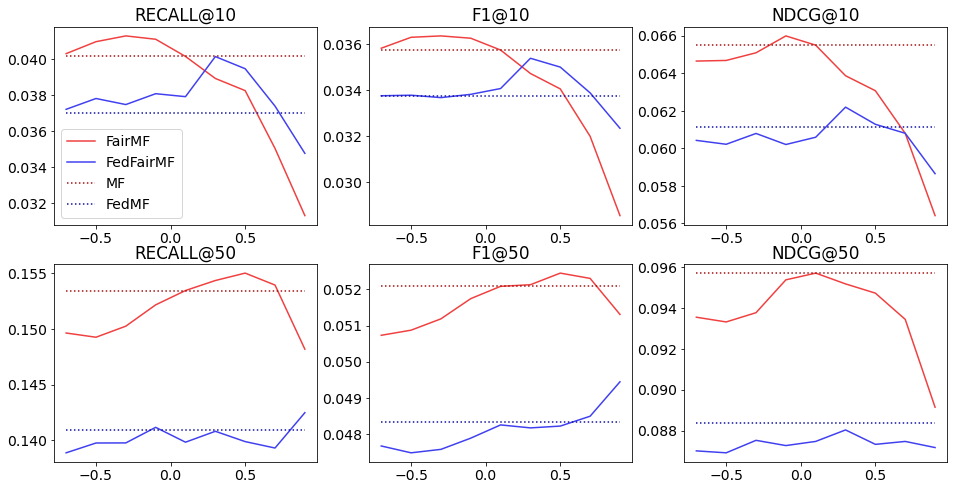

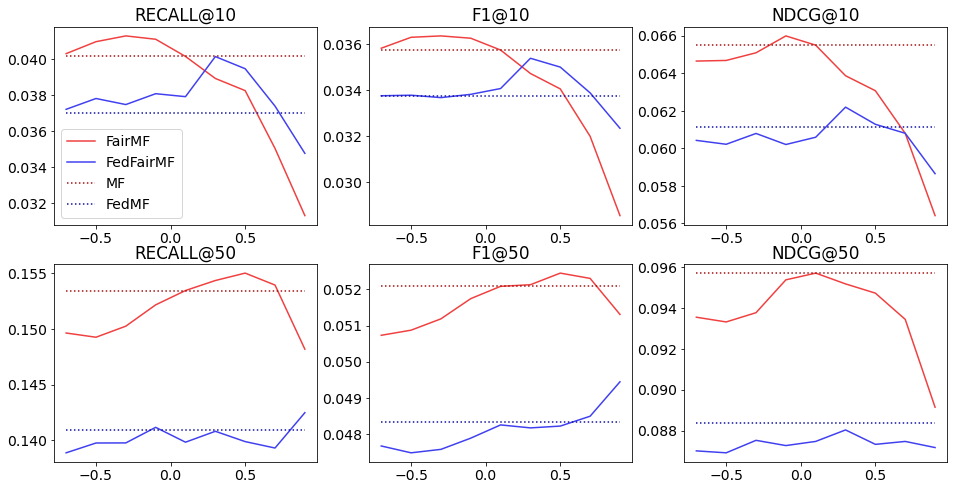

In [36]:
from utils import plot_recommendation_over_lambda
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
selected_metrics = ['RECALL@10','F1@10','NDCG@10','RECALL@50','F1@50','NDCG@50']
model_colors = {'MF': '#a01010', 'FairMF': '#f04040', 'FedMF': '#1010a0', 'FedFairMF': '#4040f0'}
for i in range(len(selected_metrics)):
    plot_recommendation_over_lambda({'FairMF': fairmf_result, 'FedFairMF': fedfairmf_result}, selected_lambda, selected_metrics, 
                                    row_height = 4, ncol = 3, other_model_results = {'MF': mf_result, 'FedMF': fedmf_result}, 
                                    legend_appear_at = 0, colors = model_colors)